In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd

plt.rcParams["figure.facecolor"] = "w"

In [160]:
fname = "./burst_info_data.pkl"

with open(fname, "rb") as fp:
    burst_info = pkl.load(fp)
print(burst_info.keys())

df_burst = pd.DataFrame(burst_info)
df_burst["cluster_id"] += 1

dict_keys(['burst_f', 'burst_range', 'burst_amp', 'cluster_id', 'pop_type'])


In [242]:
nc = 1
pop_type = 0


def read_burst(df, target_cluster_id=0, target_pop_type=-1):
    cond = (df["cluster_id"] == target_cluster_id) & (df["pop_type"] == target_pop_type)
    burst = dict()
    burst["burst_amp"] = get_attrib(df, "burst_amp", cond)
    burst["burst_f"] = get_attrib(df, "burst_f", cond)
    burst_range = get_attrib(df, "burst_range", cond)
    if burst_range.shape[0] > 0:
        burst["burst_duration"] = burst_range[:, 1] - burst_range[:, 0]
    else:
        burst["burst_duration"] = [-1]
    return burst


def get_attrib(df, attrib_name, condition):
    df_sub = df[condition]
    attrib = []
    for arr in df_sub[attrib_name]:
        attrib.extend(arr)
    return np.array(attrib)


burst_sub = read_burst(df_burst, target_cluster_id=1, target_pop_type=0)

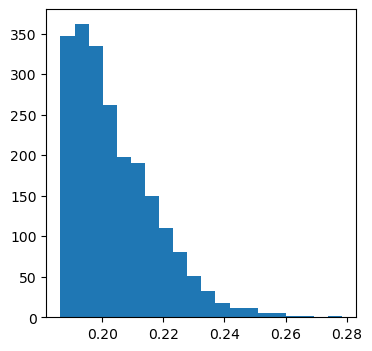

In [54]:
plt.figure(figsize=(4,4))
plt.hist(burst_sub["burst_amp"], 20)
plt.show()

In [139]:
burst = read_burst(df_burst, 4, 0)

In [155]:
df_burst["cluster_id"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

In [263]:
def draw_hist(df, target_cluster_id, figsize=(9, 3.5), dpi=120,
              f_range=(10, 100), amp_range=(0.1, 0.3), t_range=(0., 1), nbin=40,
              norm=False):
    
    keys = ("burst_f", "burst_amp", "burst_duration")
    key_range = (f_range, amp_range, t_range)
    key_labels = (r"$f_{center}$ (Hz)", r"$\langle A \rangle$", r"$T$ (s)")
    cs = ("r", "b")
    pop_labels = (r"$Fast$", r"$Slow$")
    
    num_burst = []
    fig, axs = plt.subplots(1, 3, figsize=figsize, dpi=dpi)
    for n in range(2):
        burst_sub = read_burst(df_burst, target_cluster_id=target_cluster_id, target_pop_type=n)
        num_burst.append(len(burst_sub["burst_f"]))
        for i in range(3):
            r = key_range[i]
            edges = np.linspace(r[0], r[1], nbin)
            
            if keys[i] == "burst_duration":
                dt = 0.15
                edges = np.arange(r[0], r[1]+dt/2, dt)
                
            hist_bin, _ = np.histogram(burst_sub[keys[i]], bins=edges, density=False)
            if norm:
                hist_bin = np.array(hist_bin) / np.sum(hist_bin)
            
            x = (edges[1:] + edges[:-1])/2
            axs[i].plot(x, hist_bin, '.--', lw=1, ms=5, c=cs[n], label=pop_labels[n])
            axs[i].set_xlabel(key_labels[i], fontsize=13)
    
    for i in range(3):
        axs[i].legend(loc="upper right")
        
    plt.suptitle("Cluster id = %d (# burst = %d(F),%d(S))"%(target_cluster_id, num_burst[0], num_burst[1]),
                 fontsize=14, weight="bold")
        
    plt.tight_layout()
    return fig
    

In [264]:
K = len(df_burst["cluster_id"].unique())
range_set = [{} for _ in range(K+1)]
for nc in range(1, K):
    range_set[nc]["f_range"] = (10, 90)
    range_set[nc]["amp_range"] = (0.17, 0.3)
    range_set[nc]["t_range"] = (0, 1.2)

# hard fix
range_set[5]["amp_range"]  = (0.5, 1.2)
range_set[6]["amp_range"]  = (0.28, 0.7)
range_set[7]["amp_range"]  = (0.28, 0.7)
range_set[8]["amp_range"]  = (0.5, 1.2)
range_set[9]["amp_range"]  = (0.28, 0.7)
range_set[10]["amp_range"] = (0.28, 0.7)
range_set[11]["amp_range"] = (0.5, 1.2)
range_set[12]["amp_range"] = (0.5, 1.2)
range_set[13]["amp_range"] = (0.5, 1.2)
range_set[14]["amp_range"] = (0.5, 1.2)
range_set[15]["amp_range"] = (0.5, 1.2)

In [ ]:
for nc in range(1, K+1):
    fig = draw_hist(df_burst, nc, norm=True, **range_set[nc], nbin=35)
    fig.savefig("./figs/burst_info_%02d.png"%(nc), dpi=150)